In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
%store -r diamond

In [3]:
diamond.head()

,carat,cut,color,clarity,depth,table,price
id,,,,,,,
0,0.50,5,7,5,62.3,55.0,1845
1,1.54,2,2,6,63.6,60.0,10164
2,1.32,3,1,2,61.7,60.0,5513
3,1.20,5,2,4,62.1,55.0,5174
4,1.73,4,2,4,61.2,60.0,10957


In [21]:
# Check the look of the price column:

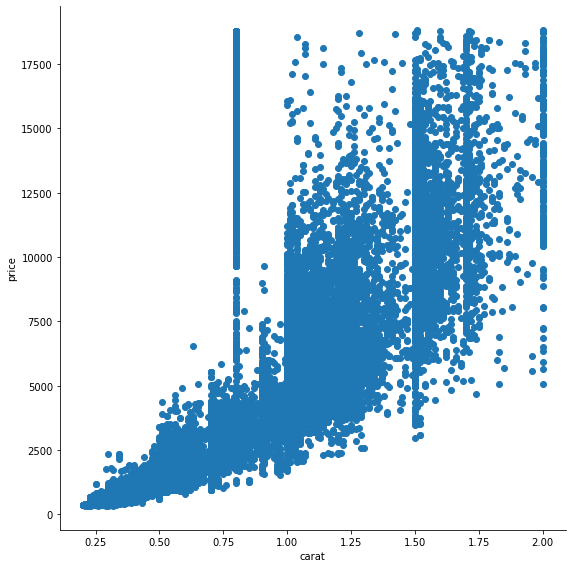

In [45]:
#Quick visualiazation for sepal-petal length and sepal-petal width
sns.FacetGrid(diamond, height = 8).map(plt.scatter,
                                                  'carat',
                                                  'price').add_legend();

In [ ]:
def fit_poly(X,y,k):
    # Transforms our data to allow for Polynomial regression (Matrix from last class)
    poly = PolynomialFeatures(k)
    X = poly.fit_transform(X.reshape(-1,1))
    # Linear Regression Model
    lr = LinearRegression()
    lr.fit(X,y)
    return lr


In [20]:
#I've tried this before, but i want to give it a second shot.
## Get rid of the outliers in the dataset

<AxesSubplot:xlabel='carat'>

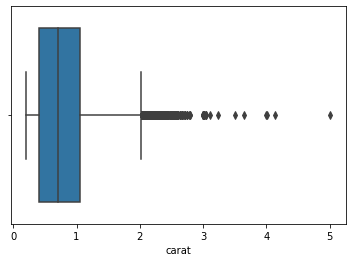

In [5]:
import seaborn as sns
sns.boxplot(x=diamond['carat'])

In [6]:
# What shall we do with the outliers?

In [7]:
mean_c = diamond['carat'].mean()
mean_d = diamond['depth'].mean()
mean_t = diamond['table'].mean()

In [8]:
#CARAT
diamond.loc[(diamond.carat > 2),'carat'] = mean_c

#DEPTH
diamond.loc[(diamond.depth > 64),'depth'] = mean_d
diamond.loc[(diamond.depth < 57),'depth'] = mean_d

#TABLE
diamond.loc[(diamond.table > 64),'table'] = mean_d
diamond.loc[(diamond.table < 51),'table'] = mean_d

In [9]:
diamond.head()

,carat,cut,color,clarity,depth,table,price
id,,,,,,,
0,0.50,5,7,5,62.3,55.0,1845
1,1.54,2,2,6,63.6,60.0,10164
2,1.32,3,1,2,61.7,60.0,5513
3,1.20,5,2,4,62.1,55.0,5174
4,1.73,4,2,4,61.2,60.0,10957


In [10]:
#Lets see if there is a differnce in the model rmse:

In [13]:
X = diamond.drop(columns = ['price'])
y = diamond['price']

In [14]:
#Split the dataset

In [15]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.8)

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Random forest

In [17]:
randforest = RandomForestRegressor(n_estimators=20, random_state=0)
randforest.fit(X_train, y_train)
y_pred_train_randforest = randforest.predict(X_train)
y_pred_test_randforest = randforest.predict(X_test)

In [18]:
#TRAIN:
print('TRAIN : Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_randforest))
print('TRAIN : Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_randforest))
print('TRAIN : Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_randforest)))
print ('----------------------------------------------------------')
#TEST:
print('TEST : Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_randforest ))
print('TEST : Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_randforest ))
print('TEST : Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_randforest )))

TRAIN : Mean Absolute Error: 122.55434802715567
TRAIN : Mean Squared Error: 63762.32331062381
TRAIN : Root Mean Squared Error: 252.512026071282
----------------------------------------------------------
TEST : Mean Absolute Error: 304.9194546028375
TEST : Mean Squared Error: 380741.33153672493
TEST : Root Mean Squared Error: 617.0424065951423


In [19]:
#Lets corroborate these values with cross validation:
scores_randforest = cross_val_score(randforest, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
scores_randforest

array([-653.76099712, -627.8804233 , -616.96012495])